In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shp
import seaborn as sns
% matplotlib inline

# The general distribution of data

## Loading the dataset

In [2]:
df = pd.read_csv('TASA.csv')
df.head()

,month,month_name,region,sum_injuries,male_injuries,female_injuries,urban_injuries,suburban_injuries,injuries_0_18,injuries_18_30,...,cause_illegal_turn,cause_illegal_crossing,cause_traffic_light_break,cause_speeding,cause_drug_use,cause_other,injuries_total,dead_total,intact_total,??? ??????? ??? ??? ????? ???????
0,1.0,Moharram,Ar Riyad,393.0,364.0,29.0,291.0,102.0,66.0,97.0,...,974.0,891.0,1208.0,1304.0,0.0,0.0,393.0,100.0,12435.0,1.33
1,2.0,Safar,Ar Riyad,433.0,387.0,46.0,276.0,157.0,44.0,117.0,...,1940.0,898.0,739.0,997.0,0.0,0.0,433.0,98.0,9110.0,1.26
2,3.0,Rabeea Awal,Ar Riyad,455.0,361.0,94.0,284.0,171.0,115.0,124.0,...,1418.0,1255.0,1380.0,2444.0,0.0,0.0,455.0,105.0,15385.0,1.21
3,4.0,Rabeea Thany,Ar Riyad,427.0,378.0,49.0,295.0,132.0,132.0,119.0,...,1608.0,1512.0,1366.0,1992.0,0.0,0.0,427.0,91.0,15181.0,1.15
4,5.0,Jamad Awal,Ar Riyad,358.0,311.0,47.0,262.0,96.0,61.0,111.0,...,1511.0,1318.0,1426.0,2228.0,0.0,0.0,358.0,96.0,15437.0,1.19


In [3]:
df.columns

Index(['month', 'month_name', 'region', 'sum_injuries', 'male_injuries',
       'female_injuries', 'urban_injuries', 'suburban_injuries',
       'injuries_0_18', 'injuries_18_30', 'injuries_30_40', 'injuries_40_50',
       'injuries_50', 'injuries_saudi', 'injuries_foreign', 'sum_dead',
       'male_dead', 'female_dead', 'urban_dead', 'suburban_dead', 'dead_0_18',
       'dead_18_30', 'dead_30_40', 'dead_40_50', 'dead_50', 'dead_saudi',
       'dead_foreign', 'sum_accidents', 'sum_involved', 'acc_damages',
       'acc_injuries', 'acc_dead', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'day', 'night', 'urban', 'suburban',
       'small_car', 'jeep', 'bus', 'pickup', 'truck', 'water_truck', 'other',
       'involved_0_18', 'involved_18_30', 'involved_30_40', 'involved_40_50',
       'involved_50', 'involved_saudi', 'involved_foreign', 'involved_married',
       'involved_single', 'involved_litrate', 'involved_illitrate',
       'private_license', '

## Daily comparison

In [4]:
days = df[['Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday','Saturday']]

In [5]:
days.head()

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,781.0,625.0,814.0,702.0,775.0,783.0,919.0
1,1407.0,1434.0,857.0,421.0,388.0,340.0,1427.0
2,1435.0,1121.0,1122.0,1140.0,1063.0,1076.0,1209.0
3,1436.0,1094.0,1054.0,1085.0,1076.0,1053.0,1368.0
4,1298.0,1014.0,1088.0,1110.0,1125.0,1196.0,1410.0


(0.0, 800.0)

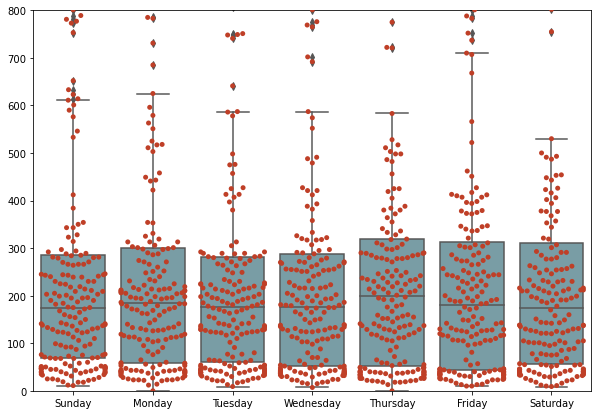

In [6]:
fig,ax = plt.subplots(figsize = (10,7))

colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax.set_prop_cycle(color = colors )
sns.boxplot(data = days, ax=ax, color='#72a2ac')
sns.swarmplot(data=days, ax=ax, color='#bf3f27')
plt.ylim(0,800)


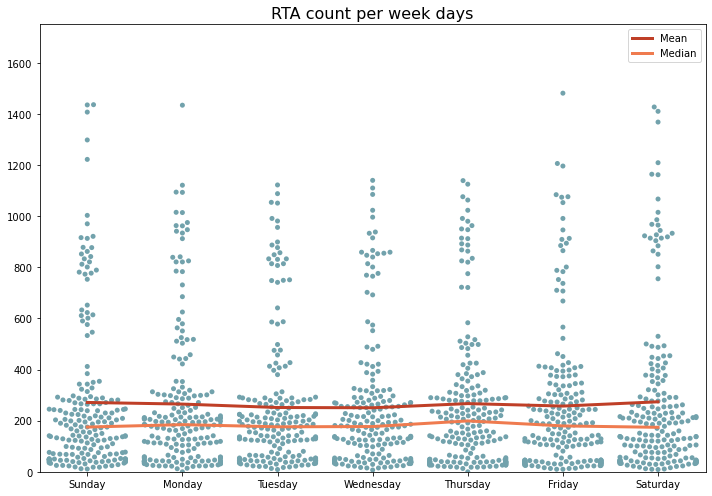

In [7]:
fig,ax = plt.subplots(figsize = (10,7))

sns.swarmplot(data=days, color = '#72a2ac', ax=ax,  zorder = 2)

plt.plot(range(len(days.mean().values)), days.mean().values, color ='#bf3f27', label = 'Mean',
        linewidth = 3 )
#for i in range(len(days.mean().values)):
    #plt.annotate(text = int(np.round(days.mean().values[i])) , xy = (range(len(days.mean().values))[i] , days.mean().values[i]),
                #color = 'k', ha = 'center', va = 'bottom', size = 12, weight="bold")    


plt.plot(range(len(days.median().values)), days.median().values, color ='#ef7b4f', label = 'Median',
        linewidth = 3)
#for i in range(len(days.median().values)):
    #plt.annotate(text = int(np.round(days.median().values[i])) ,
                 #xy = (range(len(days.median().values))[i] , days.median().values[i]),
                #color = 'k', ha = 'center', va = 'bottom', size = 12, weight="bold")    

plt.title('RTA count per week days', size = 16)
plt.ylim(0,1750)
plt.legend()
plt.tight_layout()
#plt.savefig('./output/weekdays.jpg', dpi = 300)


## Weekly comparison

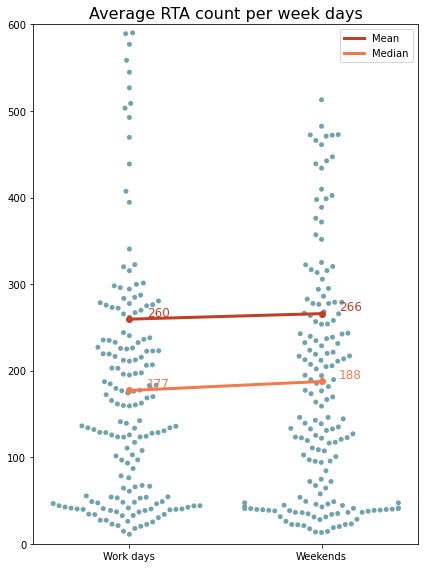

In [8]:
week = pd.DataFrame({'Work days': (days.Sunday+days.Monday+days.Tuesday+days.Wednesday)/4 ,
                     'Weekends': (days.Thursday+days.Friday+days.Saturday)/3})

fig,ax = plt.subplots(figsize = (6,8))
sns.swarmplot(data = week, color= '#72a2ac', ax=ax,  zorder = 2)

plt.scatter(x = range(len(week.mean().values)), y = week.mean().values, color ='#bf3f27', zorder=5)
plt.plot(range(len(week.mean().values)), week.mean().values, color ='#bf3f27', label = 'Mean',
        linewidth = 3 )

for i in range(len(week.mean().values)):
    plt.annotate(text = int(np.round(week.mean().values[i])) ,
                 xy = (range(len(week.mean().values))[i]+0.15 , week.mean().values[i]),
                color = '#bf3f27', ha = 'center', va = 'bottom', size = 12)


plt.scatter(x = range(len(week.median().values)), y = week.median().values, color ='#ef7b4f', zorder=5)
plt.plot(range(len(week.median().values)), week.median().values, color ='#ef7b4f', label = 'Median',
        linewidth = 3)

for i in range(len(week.median().values)):
    plt.annotate(text = int(np.round(week.median().values[i])) ,
                 xy = (range(len(week.median().values))[i]+0.15 , week.median().values[i]),
                color = '#ef7b4f', ha = 'center', va = 'bottom', size = 12)    


plt.title('Average RTA count per week days', size = 16)
plt.legend()
plt.ylim(0,600)
plt.tight_layout()
#plt.savefig('./output/workdays vs weekend.jpg', dpi = 300)

## export the tables

In [9]:
def describe_with_sum(df):
    x = df.copy()
    x = x.describe()
    summary = list(x.describe().index)
    summary.append('sum')
    x = x.append(df.sum(),True)
    x['summary']=summary
    x.set_index(x.summary, drop=True, inplace = True)
    x.drop(columns='summary',inplace=True)
    return np.round(x,2)

In [10]:
#describe_with_sum(days).to_csv('./output/days.csv')

In [11]:
#describe_with_sum(week).to_csv('./output/workdays vs weekend.csv')

# Day and night comparison

## loading the data

In [12]:
overview = pd.read_csv('overview.csv')
overview.head()

,Unnamed: 0,NAME,Total injuries,Total mortalities,Number of traffic accidents,Number of people involved in traffic accidents,Number of Accidents including damages,Number of Accidents including injuries,Number of Accidents including mortalities,Percentage of Accidents including damages,Percentage of Accidents including injuries,Percentage of Accidents including mortalities,Accidents per 1000 population,Involvment in traffic accidents per 1000 population,Injuries 1000 population,Mortalities per 1000 population
0,0,Makkah,3400.0,609.0,44915.0,88472.0,43146.0,1311.0,458.0,96.061449,2.918847,1.019704,13.770946,27.125529,1.042441,0.186719
1,1,Aseer,2192.0,696.0,25964.0,50085.0,24608.0,771.0,585.0,94.777384,2.969496,2.253120,11.467712,22.121412,0.968157,0.307407
2,2,Tabouk,977.0,293.0,10034.0,9905.0,9247.0,573.0,214.0,92.156667,5.710584,2.132749,10.420215,10.286250,1.014605,0.304278
3,3,Jazan,2112.0,563.0,19572.0,33268.0,18046.0,1098.0,428.0,92.203147,5.610055,2.186797,11.906906,20.239063,1.284865,0.342509
4,4,Al-Baha,935.0,111.0,1764.0,3918.0,1193.0,490.0,81.0,67.630385,27.777778,4.591837,3.524814,7.828923,1.868311,0.221799


#### recalculating the population

In [13]:
population = overview[['NAME','Total injuries','Injuries 1000 population']].copy()
population['population'] = (population['Total injuries']*1000)/population['Injuries 1000 population']
population.head()

,NAME,Total injuries,Injuries 1000 population,population
0,Makkah,3400.0,1.042441,3261577.0
1,Aseer,2192.0,0.968157,2264096.0
2,Tabouk,977.0,1.014605,962936.0
3,Jazan,2112.0,1.284865,1643752.0
4,Al-Baha,935.0,1.868311,500452.0


In [14]:
regions_time = df.groupby('region').mean()[['Saturday', 'Sunday', 'Monday', 'Tuesday',
                                            'Wednesday', 'Thursday', 'Friday', 'day', 'night']]
regions_time.sort_values('day', inplace = True)
regions_time.reset_index(inplace = True)

regions_time = pd.merge(regions_time,population[['NAME','population']], left_on='region', right_on='NAME').drop(columns='NAME')

### calculating the day/night accidents per capita

In [15]:
regions_time['day_10000'] = (regions_time.day*10000)/regions_time.population
regions_time['night_10000'] = (regions_time.night*10000)/regions_time.population
regions_time.head()

,region,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,day,night,population,day_10000,night_10000
0,Al-Qurayyat,40.583333,50.000000,44.500000,49.166667,46.333333,45.666667,32.333333,68.333333,240.250000,179831.0,3.799864,13.359766
1,Al-Baha,19.500000,23.083333,23.250000,21.416667,20.833333,20.583333,18.333333,99.000000,48.000000,500452.0,1.978212,0.959133
2,Najran,38.500000,45.083333,34.416667,39.583333,35.583333,28.416667,38.750000,163.583333,96.750000,617873.0,2.647524,1.565856
3,Al-Jouf,45.583333,45.416667,45.000000,44.500000,42.250000,41.416667,40.166667,179.666667,124.666667,357976.0,5.018958,3.482543
4,Hail,111.000000,95.666667,90.333333,81.500000,70.666667,67.166667,63.250000,347.750000,231.833333,728034.0,4.776563,3.184375


### visualizing the difference between day/night accidents

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


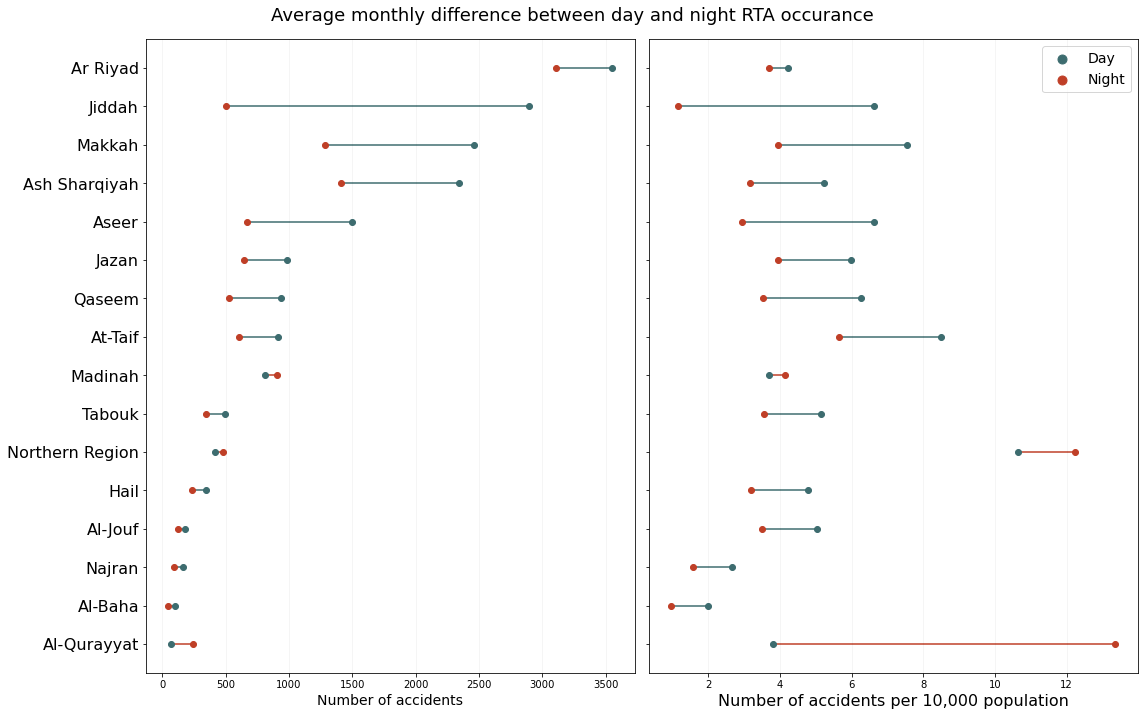

In [16]:
fig,ax = plt.subplots(figsize = (8*2,10), ncols = 2, nrows = 1, facecolor = 'w')

colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']

ax[0].scatter(x=regions_time.day, y = regions_time.region, color = colors[0], zorder = 2, label = 'Day')
ax[0].scatter(x=regions_time.night, y = regions_time.region, color = colors[-1], zorder = 2, label = 'Night')
for idx, row in regions_time.iterrows():
    if row.day > row.night:
        ax[0].plot([row.day,row.night], [row.region,row.region], color = colors[0], zorder = 1 )
    else:
        ax[0].plot([row.day,row.night], [row.region,row.region], color = colors[-1], zorder = 1 )

ax[0].grid(axis = 'x', color = 'k', alpha = 0.05)
ax[0].set_xlabel('Number of accidents', fontsize = 14)
ax[0].set_yticklabels(regions_time.region.values, fontsize = 16)
#ax[0].set_title(label = 'Average monthly difference between \nday and night RTA occurance'label = 'Average monthly difference between \nday and night RTA occurance', size = 18,
#                size = 16, color = 'grey')



ax[1].scatter(x=regions_time.day_10000, y = regions_time.region, color = colors[0], zorder = 2, label = 'Day')
ax[1].scatter(x=regions_time.night_10000, y = regions_time.region, color = colors[-1], zorder = 2, label = 'Night')
for idx, row in regions_time.iterrows():
    if row.day_10000 > row.night_10000:
        ax[1].plot([row.day_10000,row.night_10000], [row.region,row.region], color = colors[0], zorder = 1 )
    else:
        ax[1].plot([row.day_10000,row.night_10000], [row.region,row.region], color = colors[-1], zorder = 1 )

ax[1].grid(axis = 'x', color = 'k', alpha = 0.05)
ax[1].set_xlabel('Number of accidents per 10,000 population', fontsize = 16)
ax[1].set_yticklabels('')
#ax[1].set_title(label = 'Average monthly difference between \nday and night RTA occurance per 10,000 population',
#                size = 16, color = 'grey')

fig.suptitle(t = 'Average monthly difference between day and night RTA occurance', size = 18, y = 0.99 )

plt.tight_layout()
plt.legend(fontsize = 14, markerscale = 1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

#plt.savefig('./output/Day and night.jpg', dpi = 300)

plt.show()

### calculating the difference between day/night accidents count

In [17]:
dayn = np.round(regions_time[['region','day','night']].copy())
dayn.sort_values(by='day', inplace = True, ascending=False)

In [18]:
dayn['change'] = np.round((((dayn.night-dayn.day)/dayn.day)*100),2)
dayn.head()

,region,day,night,change
15,Ar Riyad,3553.0,3104.0,-12.64
14,Jiddah,2891.0,506.0,-82.50
13,Makkah,2460.0,1283.0,-47.85
12,Ash Sharqiyah,2343.0,1414.0,-39.65
11,Aseer,1497.0,667.0,-55.44


In [19]:
#dayn.to_csv('./dayn.csv')

# Difference between weekdays and weekends

### loading the data

In [20]:
df = pd.read_csv('TASA.csv')
df.head()

,month,month_name,region,sum_injuries,male_injuries,female_injuries,urban_injuries,suburban_injuries,injuries_0_18,injuries_18_30,...,cause_illegal_turn,cause_illegal_crossing,cause_traffic_light_break,cause_speeding,cause_drug_use,cause_other,injuries_total,dead_total,intact_total,??? ??????? ??? ??? ????? ???????
0,1.0,Moharram,Ar Riyad,393.0,364.0,29.0,291.0,102.0,66.0,97.0,...,974.0,891.0,1208.0,1304.0,0.0,0.0,393.0,100.0,12435.0,1.33
1,2.0,Safar,Ar Riyad,433.0,387.0,46.0,276.0,157.0,44.0,117.0,...,1940.0,898.0,739.0,997.0,0.0,0.0,433.0,98.0,9110.0,1.26
2,3.0,Rabeea Awal,Ar Riyad,455.0,361.0,94.0,284.0,171.0,115.0,124.0,...,1418.0,1255.0,1380.0,2444.0,0.0,0.0,455.0,105.0,15385.0,1.21
3,4.0,Rabeea Thany,Ar Riyad,427.0,378.0,49.0,295.0,132.0,132.0,119.0,...,1608.0,1512.0,1366.0,1992.0,0.0,0.0,427.0,91.0,15181.0,1.15
4,5.0,Jamad Awal,Ar Riyad,358.0,311.0,47.0,262.0,96.0,61.0,111.0,...,1511.0,1318.0,1426.0,2228.0,0.0,0.0,358.0,96.0,15437.0,1.19


In [21]:
subset = df[['region','Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday']].copy()
week_d = subset.groupby('region').sum()
week_d

,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
region,,,,,,,
Al-Baha,234.0,277.0,279.0,257.0,250.0,247.0,220.0
Al-Jouf,547.0,545.0,540.0,534.0,507.0,497.0,482.0
Al-Qurayyat,487.0,600.0,534.0,590.0,556.0,548.0,388.0
Ar Riyad,13117.0,12735.0,11448.0,10905.0,10474.0,10326.0,10879.0
Aseer,4984.0,3052.0,3263.0,2864.0,2951.0,4073.0,4777.0
Ash Sharqiyah,6693.0,5966.0,6297.0,6211.0,6079.0,6702.0,7129.0
At-Taif,2637.0,2561.0,2675.0,2621.0,2761.0,2563.0,2481.0
Hail,1332.0,1148.0,1084.0,978.0,848.0,806.0,759.0
Jazan,2395.0,3169.0,3544.0,2825.0,2752.0,2730.0,2157.0


In [22]:
week_d['work_days'] = week_d.Sunday + week_d.Thursday + week_d.Monday+ week_d.Tuesday+ week_d.Wednesday
week_d['weekends'] = week_d.Friday + week_d.Saturday
week_d.reset_index(inplace=True)
week_d.head()

,region,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,work_days,weekends
0,Al-Baha,234.0,277.0,279.0,257.0,250.0,247.0,220.0,1310.0,454.0
1,Al-Jouf,547.0,545.0,540.0,534.0,507.0,497.0,482.0,2623.0,1029.0
2,Al-Qurayyat,487.0,600.0,534.0,590.0,556.0,548.0,388.0,2828.0,875.0
3,Ar Riyad,13117.0,12735.0,11448.0,10905.0,10474.0,10326.0,10879.0,55888.0,23996.0
4,Aseer,4984.0,3052.0,3263.0,2864.0,2951.0,4073.0,4777.0,16203.0,9761.0


### retrieving the population data from the another dataframe

In [23]:
overview = gpd.read_file('./overview.geojson')
overview.head()

,NAME,TOTPOP_CY,x,y,Total injuries,Total mortalities,Number of traffic accidents,Number of people involved in traffic accidents,Number of Accidents including damages,Number of Accidents including injuries,Number of Accidents including mortalities,Percentage of Accidents including damages,Percentage of Accidents including injuries,Percentage of Accidents including mortalities,Accidents per 1000 population,Involvment in traffic accidents per 1000 population,Injuries 1000 population,Mortalities per 1000 population,geometry
0,Makkah,3261577,-398222.616706,2.366203e+06,3400.0,609.0,44915.0,88472.0,43146.0,1311.0,458.0,96.061449,2.918847,1.019704,13.770946,27.125529,1.042441,0.186719,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...
1,Aseer,2264096,-352045.193083,2.127645e+06,2192.0,696.0,25964.0,50085.0,24608.0,771.0,585.0,94.777384,2.969496,2.253120,11.467712,22.121412,0.968157,0.307407,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...
2,Tabouk,962936,-698604.846811,3.091249e+06,977.0,293.0,10034.0,9905.0,9247.0,573.0,214.0,92.156667,5.710584,2.132749,10.420215,10.286250,1.014605,0.304278,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...
3,Jazan,1643752,-377562.520722,1.923485e+06,2112.0,563.0,19572.0,33268.0,18046.0,1098.0,428.0,92.203147,5.610055,2.186797,11.906906,20.239063,1.284865,0.342509,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...
4,Al-Baha,500452,-509430.926111,2.256117e+06,935.0,111.0,1764.0,3918.0,1193.0,490.0,81.0,67.630385,27.777778,4.591837,3.524814,7.828923,1.868311,0.221799,"POLYGON Z ((-497258.929 2331363.256 0.000, -49..."


In [24]:
week_d = pd.merge(week_d, overview[['NAME','TOTPOP_CY']], left_on='region', right_on='NAME').drop(columns = 'NAME')
week_d.head()

,region,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,work_days,weekends,TOTPOP_CY
0,Al-Baha,234.0,277.0,279.0,257.0,250.0,247.0,220.0,1310.0,454.0,500452
1,Al-Jouf,547.0,545.0,540.0,534.0,507.0,497.0,482.0,2623.0,1029.0,357976
2,Al-Qurayyat,487.0,600.0,534.0,590.0,556.0,548.0,388.0,2828.0,875.0,179831
3,Ar Riyad,13117.0,12735.0,11448.0,10905.0,10474.0,10326.0,10879.0,55888.0,23996.0,8431083
4,Aseer,4984.0,3052.0,3263.0,2864.0,2951.0,4073.0,4777.0,16203.0,9761.0,2264096


In [25]:
week_d['work_days'] = week_d['work_days']/5
week_d['weekends'] = week_d['weekends']/2
week_d

,region,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,work_days,weekends,TOTPOP_CY
0,Al-Baha,234.0,277.0,279.0,257.0,250.0,247.0,220.0,262.0,227.0,500452
1,Al-Jouf,547.0,545.0,540.0,534.0,507.0,497.0,482.0,524.6,514.5,357976
2,Al-Qurayyat,487.0,600.0,534.0,590.0,556.0,548.0,388.0,565.6,437.5,179831
3,Ar Riyad,13117.0,12735.0,11448.0,10905.0,10474.0,10326.0,10879.0,11177.6,11998.0,8431083
4,Aseer,4984.0,3052.0,3263.0,2864.0,2951.0,4073.0,4777.0,3240.6,4880.5,2264096
5,Ash Sharqiyah,6693.0,5966.0,6297.0,6211.0,6079.0,6702.0,7129.0,6251.0,6911.0,4494027
6,At-Taif,2637.0,2561.0,2675.0,2621.0,2761.0,2563.0,2481.0,2636.2,2559.0,1079365
7,Hail,1332.0,1148.0,1084.0,978.0,848.0,806.0,759.0,972.8,1045.5,728034
8,Jazan,2395.0,3169.0,3544.0,2825.0,2752.0,2730.0,2157.0,3004.0,2276.0,1643752
9,Jiddah,5331.0,7359.0,6192.0,5681.0,5594.0,5886.0,4716.0,6142.4,5023.5,4362920


In [26]:
week_d['work_days'] = week_d['work_days']/52
week_d['weekends'] = week_d['weekends']/52
week_d['work_days_100000'] = (week_d['work_days']/week_d['TOTPOP_CY'])*100000
week_d['weekends_100000'] = (week_d['weekends']/week_d['TOTPOP_CY'])*100000
week_d.head()

,region,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,work_days,weekends,TOTPOP_CY,work_days_100000,weekends_100000
0,Al-Baha,234.0,277.0,279.0,257.0,250.0,247.0,220.0,5.038462,4.365385,500452,1.006782,0.872288
1,Al-Jouf,547.0,545.0,540.0,534.0,507.0,497.0,482.0,10.088462,9.894231,357976,2.818195,2.763937
2,Al-Qurayyat,487.0,600.0,534.0,590.0,556.0,548.0,388.0,10.876923,8.413462,179831,6.048414,4.678538
3,Ar Riyad,13117.0,12735.0,11448.0,10905.0,10474.0,10326.0,10879.0,214.953846,230.730769,8431083,2.549540,2.736668
4,Aseer,4984.0,3052.0,3263.0,2864.0,2951.0,4073.0,4777.0,62.319231,93.855769,2264096,2.752499,4.145397


### visualizing the difference

In [27]:
week_d.sort_values(by="work_days", inplace = True)

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


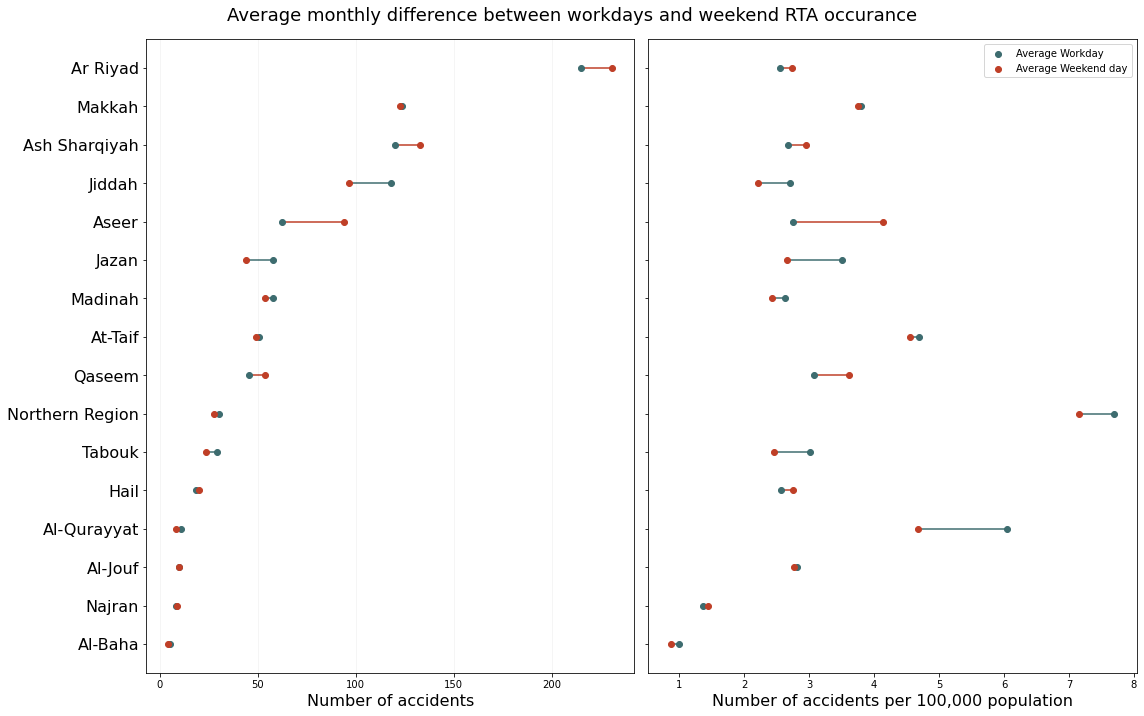

In [28]:
fig,ax = plt.subplots(figsize = (8*2,10), ncols = 2, nrows = 1, facecolor = 'w')

colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']

ax[0].scatter(x=week_d.work_days, y = week_d.region, color = colors[0], zorder = 2, label = 'Work days')
ax[0].scatter(x=week_d.weekends, y = week_d.region, color = colors[-1], zorder = 2, label = 'Weekends')
for idx, row in week_d.iterrows():
    if row.work_days > row.weekends:
        ax[0].plot([row.work_days,row.weekends], [row.region,row.region], color = colors[0], zorder = 1 )
    else:
        ax[0].plot([row.work_days,row.weekends], [row.region,row.region], color = colors[-1], zorder = 1 )

ax[0].grid(axis = 'x', color = 'k', alpha = 0.05)
ax[0].set_yticklabels(week_d.region.values, fontsize = 16)
ax[0].set_xlabel('Number of accidents', fontsize = 16)
#ax[0].set_title(label = 'Average monthly difference between RTA \noccurance in a work day and a weekend day', size = 14)



ax[1].scatter(x=week_d.work_days_100000, y = week_d.region, color = colors[0], zorder = 2, label = 'Average Workday')
ax[1].scatter(x=week_d.weekends_100000, y = week_d.region, color = colors[-1], zorder = 2, label = 'Average Weekend day')
for idx, row in week_d.iterrows():
    if row.work_days > row.weekends:
        ax[1].plot([row.work_days_100000,row.weekends_100000], [row.region,row.region], color = colors[0], zorder = 1 )
    else:
        ax[1].plot([row.work_days_100000,row.weekends_100000], [row.region,row.region], color = colors[-1], zorder = 1 )

ax[0].grid(axis = 'x', color = 'k', alpha = 0.05)
ax[1].set_xlabel('Number of accidents per 100,000 population', fontsize = 16)
ax[1].set_yticklabels('')
#ax[1].set_title(label = 'Average monthly difference between RTA occurance \nin a work day and a weekend day per 100,000 population', size = 14)

fig.suptitle(t = 'Average monthly difference between workdays and weekend RTA occurance', size = 18, y = 0.99 )

plt.tight_layout()
plt.legend()
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

#plt.savefig('./output/workday vs weekend.jpg', dpi = 300)

plt.show()

### calculating the difference between workdays and weekends

In [29]:
week_d.columns

Index(['region', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'work_days', 'weekends', 'TOTPOP_CY',
       'work_days_100000', 'weekends_100000'],
      dtype='object')

In [30]:
weekdif = np.round(week_d[['region','work_days','weekends']].copy())
weekdif.sort_values(by="work_days", ascending=False, inplace = True)

In [31]:
weekdif['difference'] = np.round((((weekdif.weekends-weekdif.work_days)/weekdif.work_days)*100),2)
weekdif.head()

,region,work_days,weekends,difference
3,Ar Riyad,215.0,231.0,7.44
11,Makkah,124.0,122.0,-1.61
5,Ash Sharqiyah,120.0,133.0,10.83
9,Jiddah,118.0,97.0,-17.80
4,Aseer,62.0,94.0,51.61


In [32]:
#weekdif.to_csv('./weekdif.csv')